# <b> Sales Performance Analysis

## <b> Initializing Libraries

In [28]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, year, month, sum as spark_sum, avg, desc
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import pandas as pd

## <b> Initialize Spark session

In [29]:
spark = SparkSession.builder \
    .appName("Sales Performance Analysis") \
    .getOrCreate()

## <b> Loading Dataset

In [30]:
file_path = "dataset/sales_data.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Display the DataFrame schema to understand the data types
df.printSchema()

root
 |-- ORDERNUMBER: integer (nullable = true)
 |-- QUANTITYORDERED: integer (nullable = true)
 |-- PRICEEACH: double (nullable = true)
 |-- ORDERLINENUMBER: integer (nullable = true)
 |-- SALES: double (nullable = true)
 |-- ORDERDATE: string (nullable = true)
 |-- DAYS_SINCE_LASTORDER: integer (nullable = true)
 |-- STATUS: string (nullable = true)
 |-- PRODUCTLINE: string (nullable = true)
 |-- MSRP: integer (nullable = true)
 |-- PRODUCTCODE: string (nullable = true)
 |-- CUSTOMERNAME: string (nullable = true)
 |-- PHONE: string (nullable = true)
 |-- ADDRESSLINE1: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- POSTALCODE: string (nullable = true)
 |-- COUNTRY: string (nullable = true)
 |-- CONTACTLASTNAME: string (nullable = true)
 |-- CONTACTFIRSTNAME: string (nullable = true)
 |-- DEALSIZE: string (nullable = true)



## <b> Data Preprocessing

In [31]:
# Convert ORDERDATE to date type
df = df.withColumn("ORDERDATE", to_date(col("ORDERDATE"), "dd/MM/yyyy"))

# Extract year and month from ORDERDATE
df = df.withColumn("YEAR", year(col("ORDERDATE"))).withColumn("MONTH", month(col("ORDERDATE")))

# Show the first few rows to verify
df.show(5)

+-----------+---------------+---------+---------------+-------+----------+--------------------+-------+-----------+----+-----------+--------------------+----------------+--------------------+----------+----------+-------+---------------+----------------+--------+----+-----+
|ORDERNUMBER|QUANTITYORDERED|PRICEEACH|ORDERLINENUMBER|  SALES| ORDERDATE|DAYS_SINCE_LASTORDER| STATUS|PRODUCTLINE|MSRP|PRODUCTCODE|        CUSTOMERNAME|           PHONE|        ADDRESSLINE1|      CITY|POSTALCODE|COUNTRY|CONTACTLASTNAME|CONTACTFIRSTNAME|DEALSIZE|YEAR|MONTH|
+-----------+---------------+---------+---------------+-------+----------+--------------------+-------+-----------+----+-----------+--------------------+----------------+--------------------+----------+----------+-------+---------------+----------------+--------+----+-----+
|      10107|             30|     95.7|              2| 2871.0|2018-02-24|                 828|Shipped|Motorcycles|  95|   S10_1678|   Land of Toys Inc.|      2125557818|897 L

## <b> Analyze Trends and Seasonal Patterns

In [32]:
# Group by year and month to get monthly sales
monthly_sales = df.groupBy("YEAR", "MONTH").agg(spark_sum("SALES").alias("TOTAL_SALES"))

# Sort by year and month
monthly_sales = monthly_sales.orderBy("YEAR", "MONTH")

# Show the results
monthly_sales.show()

+----+-----+------------------+
|YEAR|MONTH|       TOTAL_SALES|
+----+-----+------------------+
|2018|    1|          129753.6|
|2018|    2|140836.19000000003|
|2018|    3|155809.31999999998|
|2018|    4|201609.55000000002|
|2018|    5|         192673.11|
|2018|    6|168082.55999999997|
|2018|    7|187731.87999999998|
|2018|    8|          197809.3|
|2018|    9|         263973.36|
|2018|   10| 448452.9500000002|
|2018|   11|1029837.6600000001|
|2018|   12|236444.58000000002|
|2019|    1|          292688.1|
|2019|    2| 311419.5299999999|
|2019|    3|205733.72999999992|
|2019|    4|206148.12000000008|
|2019|    5| 273438.3900000001|
|2019|    6|         286674.22|
|2019|    7| 327144.0899999998|
|2019|    8| 461501.2700000001|
+----+-----+------------------+
only showing top 20 rows



## <b> Identify Top-Performing Products

In [33]:
# Group by PRODUCTLINE to get total sales per product line
product_sales = df.groupBy("PRODUCTLINE").agg(spark_sum("SALES").alias("TOTAL_SALES"))

# Sort by total sales in descending order
product_sales = product_sales.orderBy(col("TOTAL_SALES").desc())

# Show the results
product_sales.show()

+----------------+------------------+
|     PRODUCTLINE|       TOTAL_SALES|
+----------------+------------------+
|    Classic Cars|3842868.5399999963|
|    Vintage Cars|1806675.6799999995|
|Trucks and Buses|1111559.1899999997|
|     Motorcycles|1103512.1900000004|
|          Planes| 969323.4200000002|
|           Ships|         700039.22|
|          Trains|226243.46999999997|
+----------------+------------------+



## <b> Additional Analysis

In [34]:
# Average sales per order size (deal size)

# Group by DEALSIZE to get average sales per deal size
deal_size_sales = df.groupBy("DEALSIZE").agg(avg("SALES").alias("AVERAGE_SALES"))

# Show the results
deal_size_sales.show()


+--------+-----------------+
|DEALSIZE|    AVERAGE_SALES|
+--------+-----------------+
|  Medium|4396.761653076354|
|   Small|2062.627479935791|
|   Large| 8282.60789473685|
+--------+-----------------+



## <b> Sales by Country

In [35]:
# Group by COUNTRY to get total sales per country
country_sales = df.groupBy("COUNTRY").agg(spark_sum("SALES").alias("TOTAL_SALES"))

# Sort by total sales in descending order
country_sales = country_sales.orderBy(col("TOTAL_SALES").desc())

# Show the results
country_sales.show()

+-----------+------------------+
|    COUNTRY|       TOTAL_SALES|
+-----------+------------------+
|        USA|3355575.6900000013|
|      Spain|1215686.9200000009|
|     France|1110916.5199999993|
|  Australia| 630623.1000000001|
|         UK| 478880.4600000001|
|      Italy|374674.30999999976|
|    Finland| 329581.9100000001|
|     Norway| 307463.7000000001|
|  Singapore|288488.41000000003|
|    Denmark|         245637.15|
|     Canada|224078.55999999994|
|    Germany|220472.08999999994|
|     Sweden|         210014.21|
|    Austria|         202062.53|
|      Japan|188167.80999999997|
|Switzerland|117713.55999999998|
|    Belgium|         108412.62|
|Philippines|          94015.73|
|    Ireland|          57756.43|
+-----------+------------------+



## <b> Top Customers

In [36]:
# Group by CUSTOMERNAME to get total sales per customer
customer_sales = df.groupBy("CUSTOMERNAME").agg(spark_sum("SALES").alias("TOTAL_SALES"))

# Sort by total sales in descending order
customer_sales = customer_sales.orderBy(col("TOTAL_SALES").desc()).limit(10)

# Show the results
customer_sales.show()

+--------------------+------------------+
|        CUSTOMERNAME|       TOTAL_SALES|
+--------------------+------------------+
|Euro Shopping Cha...| 912294.1100000002|
|Mini Gifts Distri...|         654858.06|
|Australian Collec...|200995.40999999997|
|  Muscle Machine Inc|197736.93999999997|
|   La Rochelle Gifts|          180124.9|
|Dragon Souveniers...|172989.68000000008|
|   Land of Toys Inc.|164069.44000000003|
|The Sharp Gifts W...|160010.26999999996|
|      AV Stores, Co.|157807.80999999997|
|Anna's Decoration...|153996.13000000003|
+--------------------+------------------+



## <b> Sales Trend Visualization

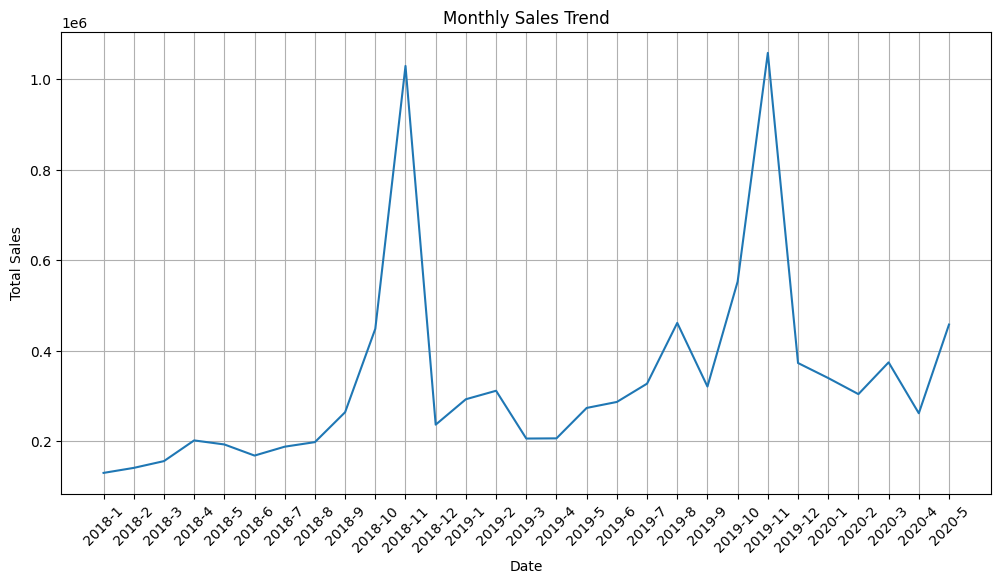

In [37]:
# Collect monthly sales data for visualization
monthly_sales_pd = monthly_sales.toPandas()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_pd['YEAR'].astype(str) + '-' + monthly_sales_pd['MONTH'].astype(str), monthly_sales_pd['TOTAL_SALES'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## <b> Correlation Analysis

In [38]:
# Select numerical columns for correlation analysis
numerical_cols = ["QUANTITYORDERED", "PRICEEACH", "SALES", "DAYS_SINCE_LASTORDER", "MSRP"]

# Calculate correlation matrix
correlation_matrix = df.select(numerical_cols).toPandas().corr()

# Print the correlation matrix
print(correlation_matrix)

                      QUANTITYORDERED  PRICEEACH     SALES  \
QUANTITYORDERED              1.000000   0.010161  0.553359   
PRICEEACH                    0.010161   1.000000  0.808287   
SALES                        0.553359   0.808287  1.000000   
DAYS_SINCE_LASTORDER        -0.021923  -0.397091 -0.334274   
MSRP                         0.020551   0.778393  0.634849   

                      DAYS_SINCE_LASTORDER      MSRP  
QUANTITYORDERED                  -0.021923  0.020551  
PRICEEACH                        -0.397091  0.778393  
SALES                            -0.334274  0.634849  
DAYS_SINCE_LASTORDER              1.000000 -0.524285  
MSRP                             -0.524285  1.000000  


## <b> Sales Performance by Product Code

In [39]:
# Group by PRODUCTCODE to get total sales per product code
product_code_sales = df.groupBy("PRODUCTCODE").agg(spark_sum("SALES").alias("TOTAL_SALES"))

# Sort by total sales in descending order
product_code_sales = product_code_sales.orderBy(col("TOTAL_SALES").desc())

# Show the results
product_code_sales.show()

+-----------+------------------+
|PRODUCTCODE|       TOTAL_SALES|
+-----------+------------------+
|   S18_3232| 284249.0199999999|
|   S10_1949|         179815.23|
|   S12_1108|         168585.32|
|   S10_4698|         158202.48|
|   S18_2238|154623.94999999998|
|   S12_3891|         145332.04|
|   S18_1662|         139421.97|
|   S24_3856|135859.19999999998|
|   S18_4027|         133779.35|
|   S12_1666|130466.79000000001|
|   S18_1129|129757.49000000002|
|   S12_2823|129738.31999999999|
|   S12_1099|         128880.66|
|   S18_3685|         128318.05|
|   S12_3148|125449.75000000001|
|   S24_2300|125273.42999999998|
|   S18_4600|123723.07999999999|
|   S18_1749|         122133.92|
|   S10_4962|121316.61999999998|
|   S18_1984|120538.81999999999|
+-----------+------------------+
only showing top 20 rows



## <b>  Aggregating Sales by City

In [40]:
# Group by CITY to get total sales per city
city_sales = df.groupBy("CITY").agg(spark_sum("SALES").alias("TOTAL_SALES"))

# Sort by total sales in descending order
city_sales = city_sales.orderBy(col("TOTAL_SALES").desc())

# Show the results
city_sales.show()

+-------------+------------------+
|         CITY|       TOTAL_SALES|
+-------------+------------------+
|       Madrid|1082551.4400000002|
|   San Rafael|         654858.06|
|          NYC| 560787.7699999998|
|    Singapore|288488.41000000003|
|        Paris|         268944.68|
|  New Bedford|         207874.86|
|       Nantes|         204304.86|
|    Melbourne|200995.40999999997|
|   Brickhaven|165255.20000000004|
|     San Jose|160010.26999999996|
|   Manchester|157807.80999999997|
|       Boston|154069.65999999997|
| North Sydney|153996.13000000003|
|    Chatswood|151570.98000000004|
| Philadelphia|151189.12999999998|
|     Salzburg|         149798.63|
|    Kobenhavn|          145041.6|
|         Lyon|142874.25000000003|
|Reggio Emilia|142601.33000000002|
|    Cambridge|139243.99999999994|
+-------------+------------------+
only showing top 20 rows



## <b> Additional Visualizations

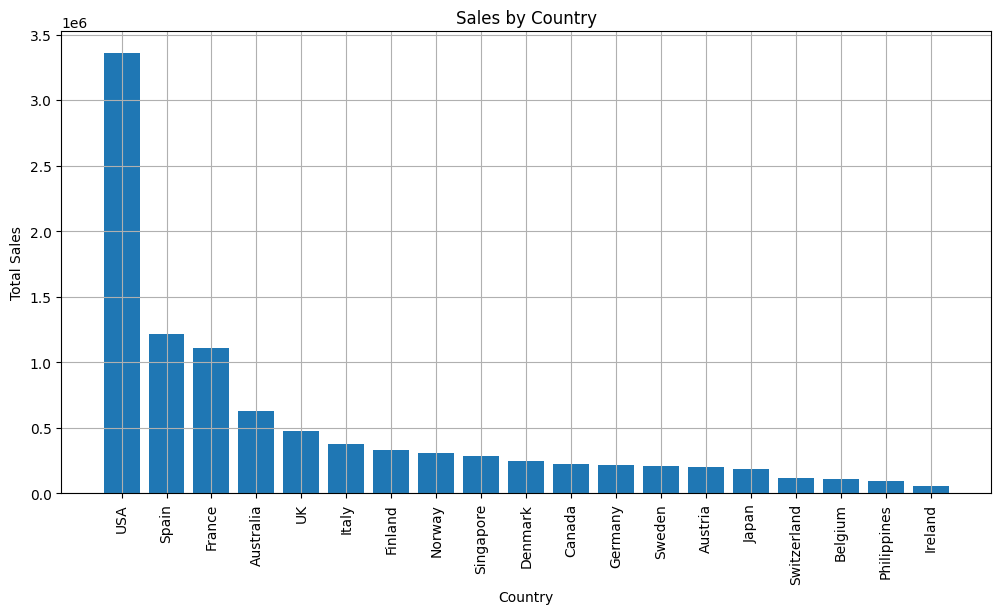

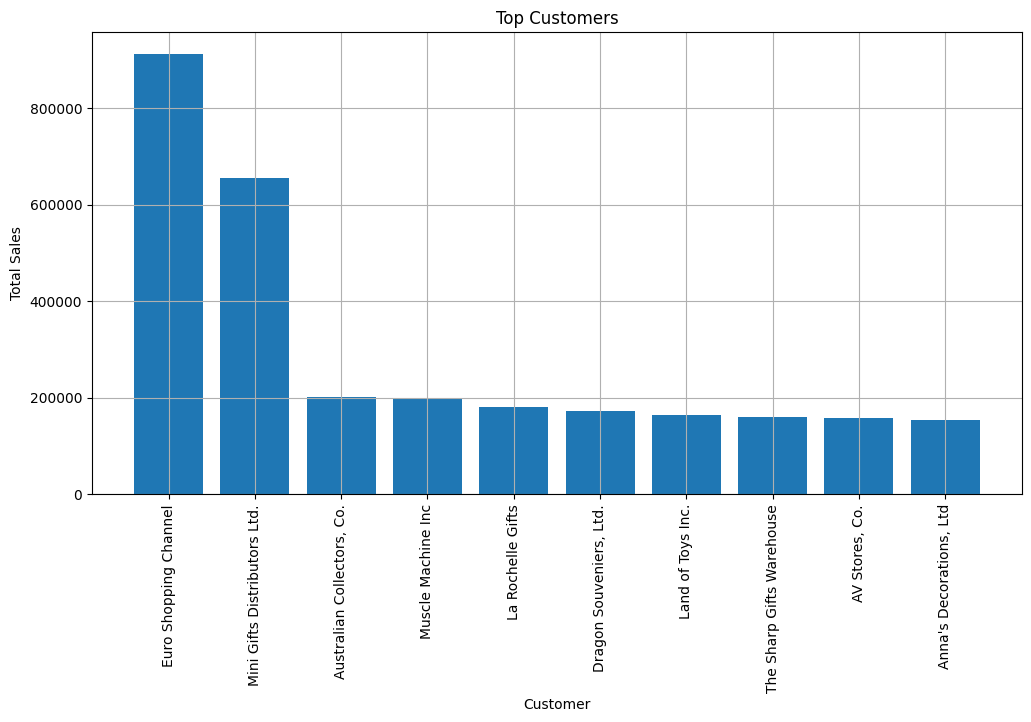

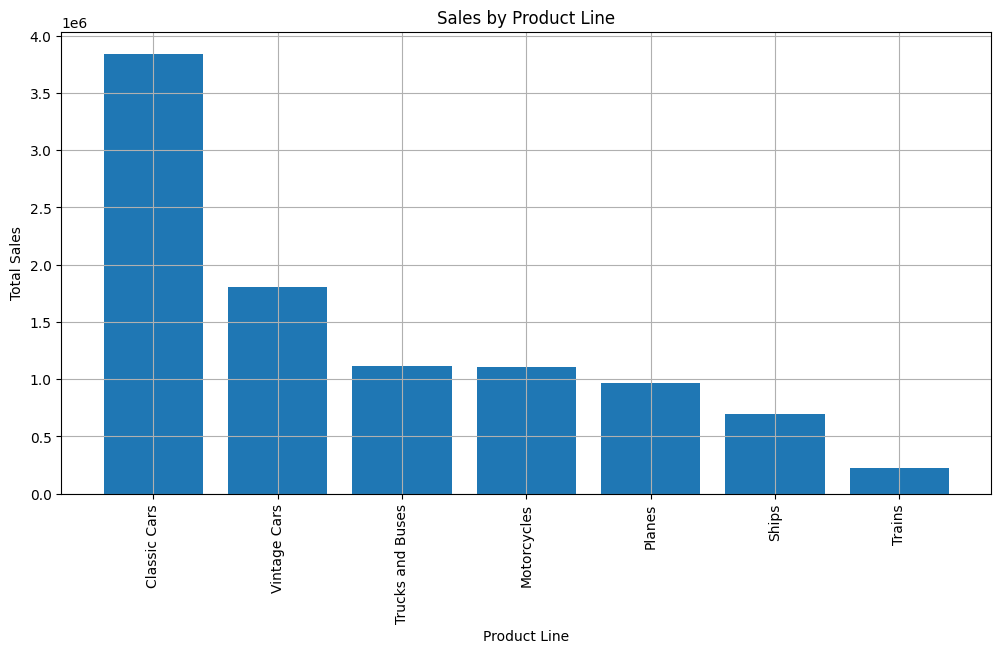

In [41]:
# Visualize sales by country
country_sales_pd = country_sales.toPandas()
plt.figure(figsize=(12, 6))
plt.bar(country_sales_pd['COUNTRY'], country_sales_pd['TOTAL_SALES'])
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Sales by Country')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Visualize top customers
top_customers_pd = customer_sales.toPandas()
plt.figure(figsize=(12, 6))
plt.bar(top_customers_pd['CUSTOMERNAME'], top_customers_pd['TOTAL_SALES'])
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.title('Top Customers')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Visualize sales by product line
product_sales_pd = product_sales.toPandas()
plt.figure(figsize=(12, 6))
plt.bar(product_sales_pd['PRODUCTLINE'], product_sales_pd['TOTAL_SALES'])
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Sales by Product Line')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


## <b> Predictive Model

In [42]:
# Preparing data for predictive model
# Using YEAR, MONTH, and other numerical columns as features
feature_cols = ["YEAR", "MONTH", "QUANTITYORDERED", "PRICEEACH", "DAYS_SINCE_LASTORDER", "MSRP"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df = assembler.transform(df)

### <b>Splitting the Data into Training and Test Sets 

In [43]:
train_data, test_data = df.randomSplit([0.8, 0.2], seed=1234)

### <b> Creating a Linear Regression Model

In [44]:
lr = LinearRegression(featuresCol="features", labelCol="SALES")

### <b> Training the Model

In [45]:
lr_model = lr.fit(train_data)

### <b> Making Predictions on the Test Data

In [46]:
predictions = lr_model.transform(test_data)

### <b> Evaluate the Model

In [47]:
test_results = lr_model.evaluate(test_data)
print("Root Mean Squared Error (RMSE):", test_results.rootMeanSquaredError)
print("R^2:", test_results.r2)

Root Mean Squared Error (RMSE): 432.04178256546845
R^2: 0.9448712238405729


## <b> Collecting Actual and Predicted Sales Data for Visualization

In [48]:
predictions_pd = predictions.select("ORDERDATE", "SALES", "prediction").toPandas()

## <b> Plot Actual vs. Predicted Sales

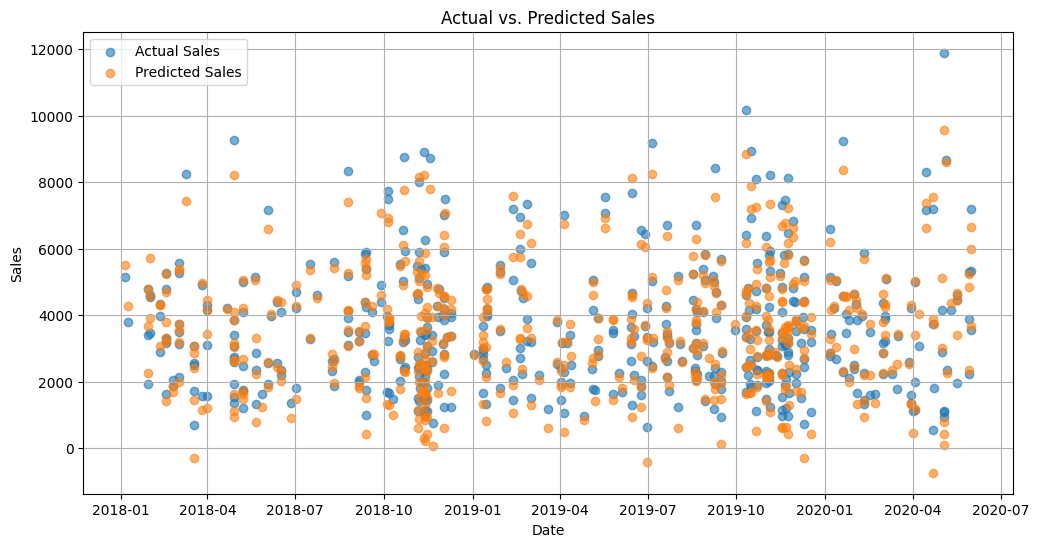

In [49]:
# Plot actual vs. predicted sales
plt.figure(figsize=(12, 6))
plt.scatter(predictions_pd["ORDERDATE"], predictions_pd["SALES"], label="Actual Sales", alpha=0.6)
plt.scatter(predictions_pd["ORDERDATE"], predictions_pd["prediction"], label="Predicted Sales", alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()

## <b> Saving the Analysis Results to CSV Files

In [50]:
monthly_sales.write.csv("output/monthly_sales.csv", header=True)
product_sales.write.csv("output/product_sales.csv", header=True)
deal_size_sales.write.csv("output/deal_size_sales.csv", header=True)
country_sales.write.csv("output/country_sales.csv", header=True)
customer_sales.write.csv("output/customer_sales.csv", header=True)
product_code_sales.write.csv("output/product_code_sales.csv", header=True)
city_sales.write.csv("output/city_sales.csv", header=True)

## <b> Saving the Predictions to a CSV File

In [51]:
predictions_pd.reset_index().to_csv("prediction/sales_predictions.csv", index=False)